In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def explode_variable(series,col):
    series = series.dropna()
    series = series.str.split(';')
    series = series.explode()
    series = series.str.strip()
    if 'DeveloperType'==col:
        devtype_dict = {'Developer, full-stack':'Full-stack developer',
                        'Developer, back-end':'Back-end developer',
                        'Developer, front-end':'Front-end developer',
                        'Developer, mobile':'Mobile developer'}
        series = series.replace(devtype_dict)
    if 'WebFrameWorkedWith'==col:
        web_dict = {'React':'React.js',
                    'Angular/Angular.js':'Angular.js',
                    'Angular':'Angular.js'}
        series = series.replace(web_dict)
    return series

In [3]:
df_free = pd.read_csv('survey_data_17_to_19.csv')
df_free.head()

,Employment,Country,Education,Major,DeveloperType,JobSatisfaction,Salary,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,Year
0,"Independent contractor, freelancer, or self-em...",France,Master's degree,Computer science or software engineering,Mobile developer; Desktop applications developer,Moderately dissatisfied,NaN,Objective-C; Swift,PostgreSQL,iOS; Amazon Web Services (AWS),NaN,2017
1,"Independent contractor, freelancer, or self-em...",U.S.,Primary/elementary school,NaN,Desktop applications developer,Moderately dissatisfied,NaN,JavaScript; VB.NET,NaN,Windows Desktop,NaN,2017
2,"Independent contractor, freelancer, or self-em...",Italy,Secondary school,NaN,Web developer,Moderately dissatisfied,NaN,PHP; SQL,MySQL,Windows Desktop; WordPress,NaN,2017
3,"Independent contractor, freelancer, or self-em...",Germany,Professional degree,Computer science or software engineering,NaN,NaN,NaN,C#; Java,NaN,Windows Desktop; Linux Desktop,NaN,2017
4,"Independent contractor, freelancer, or self-em...",Brazil,Some college/university study without earning ...,Computer science or software engineering,Web developer,Neither satisfied nor dissatisfied,NaN,JavaScript,MongoDB,NaN,Node.js; React; Firebase,2017


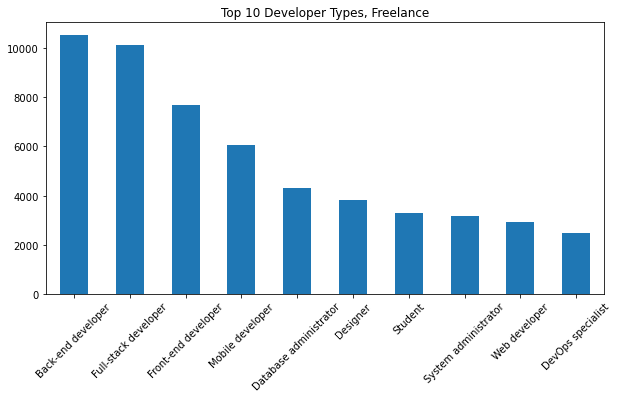

In [4]:
plt.figure(figsize=(10,5))
series = explode_variable(df_free['DeveloperType'],'DeveloperType')
series.value_counts().head(10).sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Developer Types, Freelance')
plt.xticks(rotation=45)
plt.show()

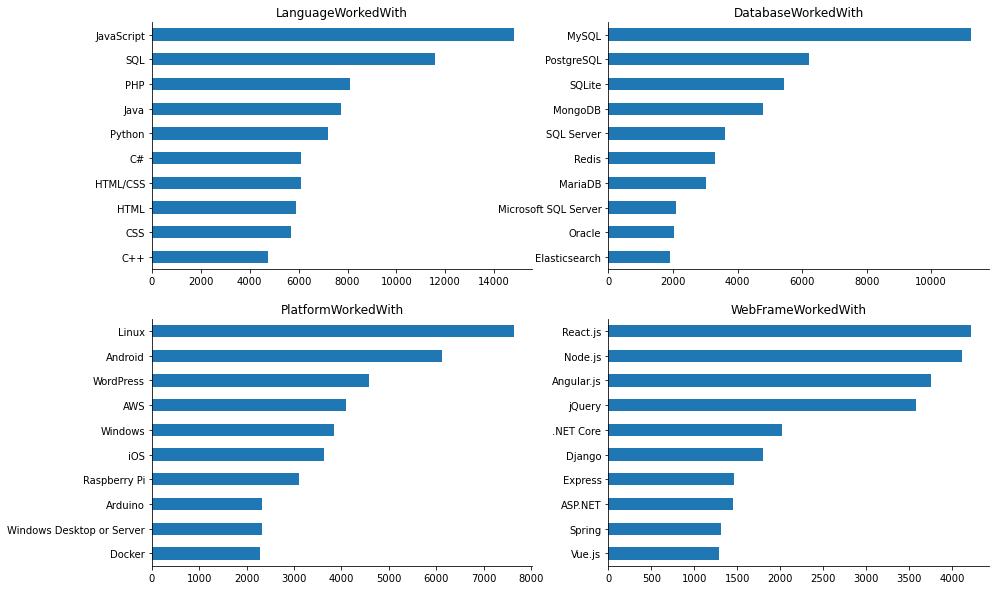

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

<Figure size 216x360 with 0 Axes>

In [5]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

a = 0
b = 0

for col in ['LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith']:
    plt.figure(figsize=(3,5))
    series = explode_variable(df_free[col],col)
    series.value_counts().head(10).sort_values().plot(kind='barh',ax=ax[a,b])
    ax[a,b].spines['right'].set_visible(False)
    ax[a,b].spines['top'].set_visible(False)
    ax[a,b].set_title(str(col));
    b+=1
    if(b==2):
        b=0
        a+=1
plt.show();